In [ ]:
import os
import json
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

experiment_dir = Path("/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/experiments")
training_data_cache_dir = Path("/gpfs/Labs/Uzun/SCRIPTS/PROJECTS/2024.SINGLE_CELL_GRN_INFERENCE.MOELLER/data/training_data_cache")

experiment_dict = {
    "Initial Settings": experiment_dir / "mESC_no_scale_linear" / "model_training_192_10k_metacells",

    "large_neighborhood_count_filter": experiment_dir / "mESC_large_neighborhood_count_filter" / "chr19" / "model_training_001",
    "large_neighborhood": experiment_dir / "mESC_large_neighborhood" / "chr19" / "model_training_001",
    "small_neighborhood": experiment_dir / "mESC_small_neighborhood" / "chr19" / "model_training_001",
    "small_neighborhood_high_self_weight": experiment_dir / "mESC_small_neighborhood_high_self_weight" / "chr19" / "model_training_001",

    "slower_dist_decay": experiment_dir / "mESC_slower_dist_decay" / "chr19" / "model_training_001",
    "max_dist_bias": experiment_dir / "mESC_max_dist_bias" / "chr19" / "model_training_002",
    "slow_decay_max_dist": experiment_dir / "mESC_slow_decay_max_dist" / "chr19" / "model_training_001",

    "filter_lowest_ten_pct": experiment_dir / "mESC_filter_lowest_ten_pct" / "chr19" / "model_training_003",
    "lower_peak_threshold": experiment_dir / "mESC_lower_peak_threshold" / "chr19" / "model_training_001",
    "no_filter_to_nearest_gene": experiment_dir / "mESC_no_filter_to_nearest_gene" / "chr19" / "model_training_003",

    "smaller_window_size": experiment_dir / "mESC_smaller_window_size" / "chr19" / "model_training_004",
    "larger_window_size": experiment_dir / "mESC_larger_window_size" / "chr19" / "model_training_002",

    "lower_max_peak_dist": experiment_dir / "mESC_lower_max_peak_dist" / "chr19" / "model_training_002",
    "higher_max_peak_dist": experiment_dir / "mESC_higher_max_peak_dist" / "chr19" / "model_training_002",

    "test_new_pipeline": experiment_dir / "mESC_test_new_pipeline" / "chr19" / "model_training_002",

    "slow_decay_filter_ten_pct": experiment_dir / "mESC_slow_decay_filter_ten_pct" / "chr19" / "model_training_001",
    "fast_decay_large_window": experiment_dir / "mESC_fast_decay_large_window" / "chr19" / "model_training_001",
    "slow_decay_small_window": experiment_dir / "mESC_slow_decay_small_window" / "chr19" / "model_training_001",

    "fewer_pca_components": experiment_dir / "mESC_fewer_pca_components" / "chr19" / "model_training_001",
    "more_pca_components": experiment_dir / "mESC_more_pca_components" / "chr19" / "model_training_001",

    "one_hop_diffusion": experiment_dir / "mESC_one_hop_diffusion" / "chr19" / "model_training_001",
    "two_hop_diffusion": experiment_dir / "mESC_two_hop_diffusion" / "chr19" / "model_training_001",
    "one_hop_large_neighborhood": experiment_dir / "mESC_one_hop_large_neighborhood" / "chr19" / "model_training_001",

    "strict_genes_lenient_peaks": experiment_dir / "mESC_strict_genes_lenient_peaks" / "chr19" / "model_training_001",
    "lenient_genes_strict_peaks": experiment_dir / "mESC_lenient_genes_strict_peaks" / "chr19" / "model_training_001",
    "strict_filter_twenty_pct": experiment_dir / "mESC_strict_filter_twenty_pct" / "chr19" / "model_training_001",

    "promoter_2kb": experiment_dir / "mESC_promoter_2kb" / "chr19" / "model_training_001",
    "promoter_5kb": experiment_dir / "mESC_promoter_5kb" / "chr19" / "model_training_001",

    "very_short_range": experiment_dir / "mESC_very_short_range" / "chr19" / "model_training_001",
    "long_range_enhancers": experiment_dir / "mESC_long_range_enhancers" / "chr19" / "model_training_001",
}


experiment_training_data_dict = {
    "Initial Settings": training_data_cache_dir / "mESC_no_scale_linear",

    "large_neighborhood_count_filter": training_data_cache_dir / "mESC_large_neighborhood_count_filter",
    "large_neighborhood": training_data_cache_dir / "mESC_large_neighborhood",
    "small_neighborhood": training_data_cache_dir / "mESC_small_neighborhood",
    "small_neighborhood_high_self_weight": training_data_cache_dir / "mESC_small_neighborhood_high_self_weight",

    "slower_dist_decay": training_data_cache_dir / "mESC_slower_dist_decay",
    "max_dist_bias": training_data_cache_dir / "mESC_max_dist_bias",
    "slow_decay_max_dist": training_data_cache_dir / "mESC_slow_decay_max_dist",

    "filter_lowest_ten_pct": training_data_cache_dir / "mESC_filter_lowest_ten_pct",
    "lower_peak_threshold": training_data_cache_dir / "mESC_lower_peak_threshold",
    "no_filter_to_nearest_gene": training_data_cache_dir / "mESC_no_filter_to_nearest_gene",

    "smaller_window_size": training_data_cache_dir / "mESC_smaller_window_size",
    "larger_window_size": training_data_cache_dir / "mESC_larger_window_size",

    "lower_max_peak_dist": training_data_cache_dir / "mESC_lower_max_peak_dist",
    "higher_max_peak_dist": training_data_cache_dir / "mESC_higher_max_peak_dist",

    "test_new_pipeline": training_data_cache_dir / "mESC_test_new_pipeline",

    "slow_decay_filter_ten_pct": training_data_cache_dir / "mESC_slow_decay_filter_ten_pct",
    "fast_decay_large_window": training_data_cache_dir / "mESC_fast_decay_large_window",
    "slow_decay_small_window": training_data_cache_dir / "mESC_slow_decay_small_window",

    "fewer_pca_components": training_data_cache_dir / "mESC_fewer_pca_components",
    "more_pca_components": training_data_cache_dir / "mESC_more_pca_components",

    "one_hop_diffusion": training_data_cache_dir / "mESC_one_hop_diffusion",
    "two_hop_diffusion": training_data_cache_dir / "mESC_two_hop_diffusion",
    "one_hop_large_neighborhood": training_data_cache_dir / "mESC_one_hop_large_neighborhood",

    "strict_genes_lenient_peaks": training_data_cache_dir / "mESC_strict_genes_lenient_peaks",
    "lenient_genes_strict_peaks": training_data_cache_dir / "mESC_lenient_genes_strict_peaks",
    "strict_filter_twenty_pct": training_data_cache_dir / "mESC_strict_filter_twenty_pct",

    "promoter_2kb": training_data_cache_dir / "mESC_promoter_2kb",
    "promoter_5kb": training_data_cache_dir / "mESC_promoter_5kb",

    "very_short_range": training_data_cache_dir / "mESC_very_short_range",
    "long_range_enhancers": training_data_cache_dir / "mESC_long_range_enhancers",
}


# Excel/Sheet ordering
GT_ORDER = ["ChIP-Atlas", "RN111", "RN112", "RN114", "RN115", "RN116"]
METHOD_ORDER = ["Gradient Attribution", "TF Knockout"]

def compute_total_windows(cache_dir: Path) -> int:
    total = 0
    for d in cache_dir.iterdir():
        if d.is_dir() and d.name.startswith("chr"):
            with open(cache_dir / d / f"window_map_{d.name}.json", "r") as f:
                window_map = json.load(f)
            total += len(window_map)
    return total

def format_block_columns(prefix: str, gt_order=GT_ORDER):
    """
    Returns the column order for one method block exactly like your sheet:
    Experiment | Mean AUROC/AUPRC | then each GT has AUROC, Per-TF AUROC, AUPRC, Per-TF AUPRC
    """
    cols = [
        (prefix, "Mean", "AUROC"),
        (prefix, "Mean", "AUPRC"),
        (prefix, "Mean", "Per-TF AUROC"),
        (prefix, "Mean", "Per-TF AUPRC"),
    ]
    for gt in gt_order:
        cols += [
            (prefix, gt, "AUROC"),
            (prefix, gt, "Per-TF AUROC"),
            (prefix, gt, "AUPRC"),
            (prefix, gt, "Per-TF AUPRC"),
        ]
    return cols

all_experiments = []

for experiment_name, EXPERIMENT_DIR in experiment_dict.items():
    print(f"\nProcessing experiment: {experiment_name}")

    # --- dataset sizes ---
    with open(EXPERIMENT_DIR / "tf_vocab.json", "r") as f:
        num_tfs = len(json.load(f))
    with open(EXPERIMENT_DIR / "tg_vocab.json", "r") as f:
        num_tgs = len(json.load(f))

    
    total_windows = compute_total_windows(experiment_training_data_dict[experiment_name])

    # --- final R2 ---
    training_results = pd.read_csv(EXPERIMENT_DIR / "training_log.csv")
    final_epoch_results = training_results.iloc[-1]
    final_train_unscaled_r2 = float(final_epoch_results["R2_u"])
    final_train_scaled_r2   = float(final_epoch_results["R2_s"])

    # ============================================================
    # UPDATED PART: pooled vs per-TF loaded separately
    # ============================================================

    # ---------- 1) POOLED overall mean AUROC/AUPRC ----------
    pooled_overall = pd.read_csv(EXPERIMENT_DIR / "method_ranking_by_auroc_pooled.csv", header=0)
    pooled_overall = pooled_overall.rename(columns={"name": "method_name"})
    pooled_overall = pooled_overall[pooled_overall["method_name"].isin(METHOD_ORDER)]
    pooled_overall = pooled_overall.set_index("method_name")[["mean_auroc", "mean_auprc"]]

    # ---------- 2) POOLED per-GT AUROC/AUPRC ----------
    pooled_gt = pd.read_csv(EXPERIMENT_DIR / "per_gt_method_aucs_pooled.csv", header=0)
    pooled_gt = pooled_gt.rename(columns={"name": "method_name"})
    pooled_gt = pooled_gt[pooled_gt["method_name"].isin(METHOD_ORDER)]
    pooled_gt = pooled_gt[pooled_gt["gt_name"].isin(GT_ORDER)]

    pooled_gt_auroc = pooled_gt.pivot(index="method_name", columns="gt_name", values="auroc")
    pooled_gt_auprc = pooled_gt.pivot(index="method_name", columns="gt_name", values="auprc")

    # ---------- 3) PER-TF detailed -> mean across TFs ----------
    per_tf = pd.read_csv(EXPERIMENT_DIR / "per_tf_auroc_auprc_detailed.csv", header=0)

    # Standardize method column name
    if "method" in per_tf.columns and "method_name" not in per_tf.columns:
        per_tf = per_tf.rename(columns={"method": "method_name"})

    per_tf = per_tf[per_tf["method_name"].isin(METHOD_ORDER)].copy()
    per_tf = per_tf[per_tf["gt_name"].isin(GT_ORDER)].copy()

    # Per-GT per-method: mean across TFs
    per_tf_gt_means = (
        per_tf.groupby(["method_name", "gt_name"], as_index=False)
            .agg(
                per_tf_auroc=("auroc", "mean"),
                per_tf_auprc=("auprc", "mean"),
                n_tfs=("tf", "nunique"),
            )
    )

    per_tf_auroc_lookup = per_tf_gt_means.set_index(["method_name", "gt_name"])["per_tf_auroc"].to_dict()
    per_tf_auprc_lookup = per_tf_gt_means.set_index(["method_name", "gt_name"])["per_tf_auprc"].to_dict()

    # Overall per-TF mean across GTs (left mean block "Per-TF AUROC/AUPRC")
    per_tf_overall = (
        per_tf_gt_means.groupby("method_name", as_index=False)
                    .agg(
                        per_tf_mean_auroc=("per_tf_auroc", "mean"),
                        per_tf_mean_auprc=("per_tf_auprc", "mean"),
                    )
                    .set_index("method_name")
    )

    # ---------- 4) Build one row for this experiment ----------
    row = {
        ("Meta", "", "Experiment"): experiment_name,
        ("Meta", "", "num_tfs"): num_tfs,
        ("Meta", "", "num_windows"): total_windows,
        ("Meta", "", "num_tgs"): num_tgs,
        ("Meta", "", "unscaled_r2"): final_train_unscaled_r2,
        ("Meta", "", "scaled_r2"): final_train_scaled_r2,
    }

    for method in METHOD_ORDER:
        # ---- Mean block ----
        # pooled mean AUROC/AUPRC
        row[(method, "Mean", "AUROC")] = (
            float(pooled_overall.loc[method, "mean_auroc"])
            if method in pooled_overall.index else np.nan
        )
        row[(method, "Mean", "AUPRC")] = (
            float(pooled_overall.loc[method, "mean_auprc"])
            if method in pooled_overall.index else np.nan
        )

        # per-TF mean AUROC/AUPRC (mean across TFs, then mean across GTs)
        row[(method, "Mean", "Per-TF AUROC")] = (
            float(per_tf_overall.loc[method, "per_tf_mean_auroc"])
            if method in per_tf_overall.index else np.nan
        )
        row[(method, "Mean", "Per-TF AUPRC")] = (
            float(per_tf_overall.loc[method, "per_tf_mean_auprc"])
            if method in per_tf_overall.index else np.nan
        )

        # ---- Per-GT blocks ----
        for gt in GT_ORDER:
            # pooled per-GT AUROC/AUPRC
            row[(method, gt, "AUROC")] = (
                float(pooled_gt_auroc.loc[method, gt])
                if (method in pooled_gt_auroc.index and gt in pooled_gt_auroc.columns) else np.nan
            )
            row[(method, gt, "AUPRC")] = (
                float(pooled_gt_auprc.loc[method, gt])
                if (method in pooled_gt_auprc.index and gt in pooled_gt_auprc.columns) else np.nan
            )

            # per-TF per-GT means (mean across TFs)
            row[(method, gt, "Per-TF AUROC")] = float(per_tf_auroc_lookup.get((method, gt), np.nan))
            row[(method, gt, "Per-TF AUPRC")] = float(per_tf_auprc_lookup.get((method, gt), np.nan))

    all_experiments.append(row)


# Build final dataframe
final_df = pd.DataFrame(all_experiments)

# Order columns to match your sheet grouping
meta_cols = [
    ("Meta", "", "Experiment"),
    ("Meta", "", "num_tfs"),
    ("Meta", "", "num_windows"),
    ("Meta", "", "num_tgs"),
    ("Meta", "", "unscaled_r2"),
    ("Meta", "", "scaled_r2"),
]

ordered_cols = meta_cols + format_block_columns("Gradient Attribution") + format_block_columns("TF Knockout")
ordered_cols = [c for c in ordered_cols if c in final_df.columns]  # safety

final_df = final_df[ordered_cols]


# Flatten columns for easy Excel export
def flat(c):
    a, b, d = c
    if a == "Meta":
        return d
    # e.g. "Gradient Attribution | RN111 | Per-TF AUROC"
    return f"{a} | {b} | {d}"

final_df.columns = [flat(c) for c in final_df.columns]

print(final_df.head())
final_df.to_csv("dev/notebooks/organized_experiment_results_raw.csv", index=False)

# Export
final_df.to_excel("dev/notebooks/excel_chart_ready.xlsx", index=False)
print("Wrote: excel_chart_ready.xlsx")



Processing experiment: Initial Settings

Processing experiment: large_neighborhood_count_filter

Processing experiment: large_neighborhood

Processing experiment: small_neighborhood

Processing experiment: small_neighborhood_high_self_weight

Processing experiment: slower_dist_decay

Processing experiment: max_dist_bias

Processing experiment: slow_decay_max_dist

Processing experiment: filter_lowest_ten_pct

Processing experiment: lower_peak_threshold

Processing experiment: no_filter_to_nearest_gene

Processing experiment: smaller_window_size

Processing experiment: larger_window_size

Processing experiment: lower_max_peak_dist

Processing experiment: higher_max_peak_dist

Processing experiment: test_new_pipeline

Processing experiment: slow_decay_filter_ten_pct

Processing experiment: fast_decay_large_window

Processing experiment: slow_decay_small_window

Processing experiment: fewer_pca_components

Processing experiment: more_pca_components

Processing experiment: one_hop_diffusi

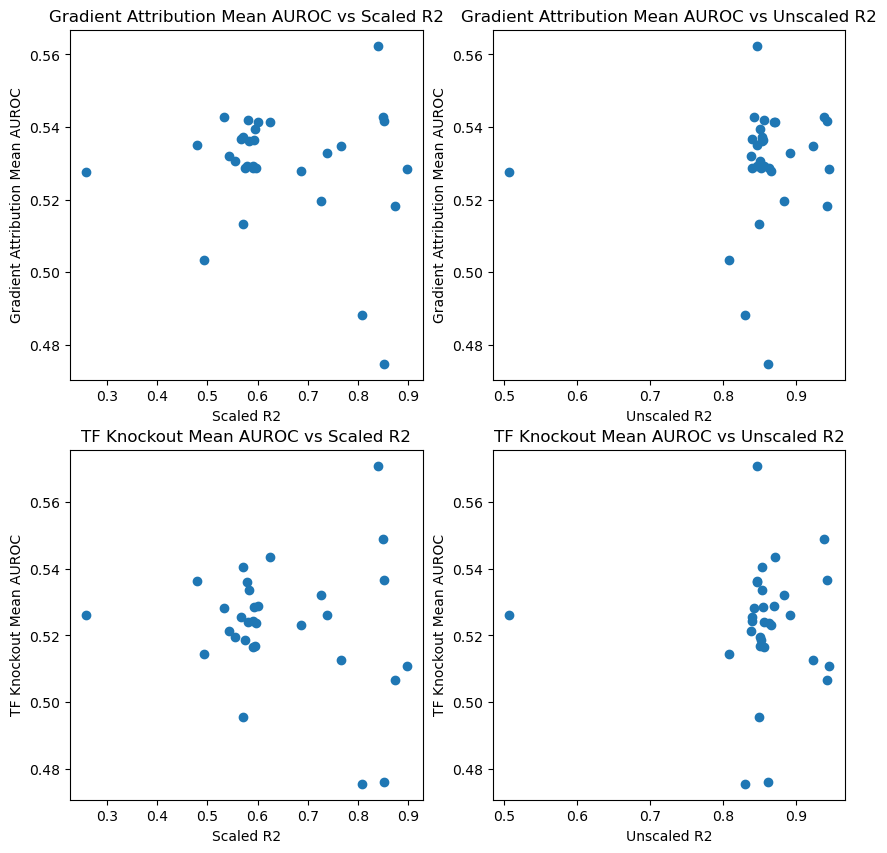

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax[0,0].set_title("Gradient Attribution Mean AUROC vs Scaled R2")
ax[0,0].scatter(final_df["scaled_r2"], final_df["Gradient Attribution | Mean | AUROC"])
ax[0,0].set_ylabel("Gradient Attribution Mean AUROC")
ax[0,0].set_xlabel("Scaled R2")

ax[0,1].set_title("Gradient Attribution Mean AUROC vs Unscaled R2")
ax[0,1].scatter(final_df["unscaled_r2"], final_df["Gradient Attribution | Mean | AUROC"])
ax[0,1].set_ylabel("Gradient Attribution Mean AUROC")
ax[0,1].set_xlabel("Unscaled R2")

ax[1,0].set_title("TF Knockout Mean AUROC vs Scaled R2")
ax[1,0].scatter(final_df["scaled_r2"], final_df["TF Knockout | Mean | AUROC"])
ax[1,0].set_ylabel("TF Knockout Mean AUROC")
ax[1,0].set_xlabel("Scaled R2")

ax[1,1].set_title("TF Knockout Mean AUROC vs Unscaled R2")
ax[1,1].scatter(final_df["unscaled_r2"], final_df["TF Knockout | Mean | AUROC"])
ax[1,1].set_ylabel("TF Knockout Mean AUROC")
ax[1,1].set_xlabel("Unscaled R2")


plt.show()

In [49]:
df = final_df.copy()

# Baseline experiment
BASELINE = "Initial Settings"

GTs = ["ChIP-Atlas", "RN111", "RN112", "RN114", "RN115", "RN116"]
METHODS = ["Gradient Attribution", "TF Knockout"]

def melt_gt_metrics(df, metric="Per-TF AUROC"):
    """
    Returns tidy df with:
    Experiment | Method | GT | Value
    """
    rows = []
    for _, r in df.iterrows():
        exp = r["Experiment"]
        for method in METHODS:
            for gt in GTs:
                col = f"{method} | {gt} | {metric}"
                if col in df.columns:
                    rows.append({
                        "Experiment": exp,
                        "Method": method,
                        "Metric": metric,
                        "GT": gt,
                        "Value": r[col]
                    })
    return pd.DataFrame(rows)

def compute_gt_deltas(long_df):
    baseline = (
        long_df[long_df["Experiment"] == BASELINE]
        .set_index(["Method", "GT", "Metric"])["Value"]
    )

    long_df = long_df.copy()
    long_df["Delta"] = long_df.apply(
        lambda r: r["Value"] - baseline.loc[(r["Method"], r["GT"])],
        axis=1
    )
    return long_df

def plot_gt_delta_heatmap(per_tf_delta, method, selected_metric, sort_by="mean"):
    sub = per_tf_delta[
        (per_tf_delta["Method"] == method) &
        (per_tf_delta["Experiment"] != BASELINE) &
        (per_tf_delta["Metric"] == selected_metric)
    ]

    mat = sub.pivot_table(
        index="Experiment",
        columns="GT",
        values="Delta",
        aggfunc="mean"
    )

    if sort_by == "mean":
        mat = mat.loc[mat.mean(axis=1).sort_values(ascending=False).index]

    plt.figure(figsize=(10, max(6, 0.30 * len(mat))))
    sns.heatmap(
        mat,
        center=0,
        cmap="viridis",
        linewidths=0.5,
        cbar_kws={"label": f"Δ {selected_metric}"}
    )
    plt.title(f"{method}\nPer-Experiment change in {selected_metric} by ground truth", fontsize=14)
    plt.tight_layout()
    plt.show()

selected_metric = "Per-TF AUROC"

melted_df = melt_gt_metrics(df, metric=selected_metric)

per_tf_gt_delta = compute_gt_deltas(melted_df)

ranked = (
    per_tf_gt_delta[per_tf_gt_delta["Experiment"] != BASELINE]
    .groupby(["Method", "GT", "Metric", "Experiment"])["Delta"]
    .mean()
    .reset_index()
    .sort_values(["Method", "GT", "Delta"], ascending=[True, True, False])
)

print(ranked.head(10))


                  Method          GT        Metric  \
0   Gradient Attribution  ChIP-Atlas  Per-TF AUROC   
28  Gradient Attribution  ChIP-Atlas  Per-TF AUROC   
21  Gradient Attribution  ChIP-Atlas  Per-TF AUROC   
9   Gradient Attribution  ChIP-Atlas  Per-TF AUROC   
23  Gradient Attribution  ChIP-Atlas  Per-TF AUROC   
24  Gradient Attribution  ChIP-Atlas  Per-TF AUROC   
29  Gradient Attribution  ChIP-Atlas  Per-TF AUROC   
11  Gradient Attribution  ChIP-Atlas  Per-TF AUROC   
16  Gradient Attribution  ChIP-Atlas  Per-TF AUROC   
1   Gradient Attribution  ChIP-Atlas  Per-TF AUROC   

                             Experiment     Delta  
0               fast_decay_large_window -0.003177  
28                    two_hop_diffusion -0.003222  
21                    slower_dist_decay -0.004316  
9                   lower_max_peak_dist -0.005298  
23  small_neighborhood_high_self_weight -0.006068  
24                  smaller_window_size -0.006279  
29                     very_short_range -

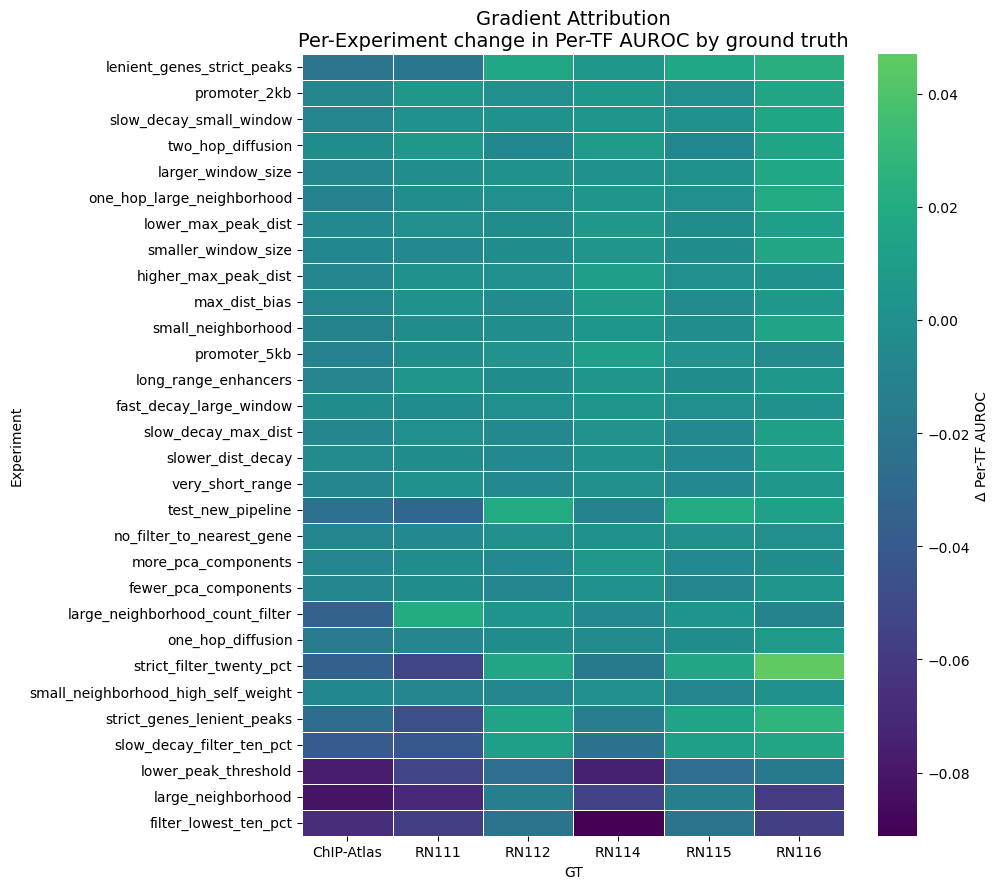

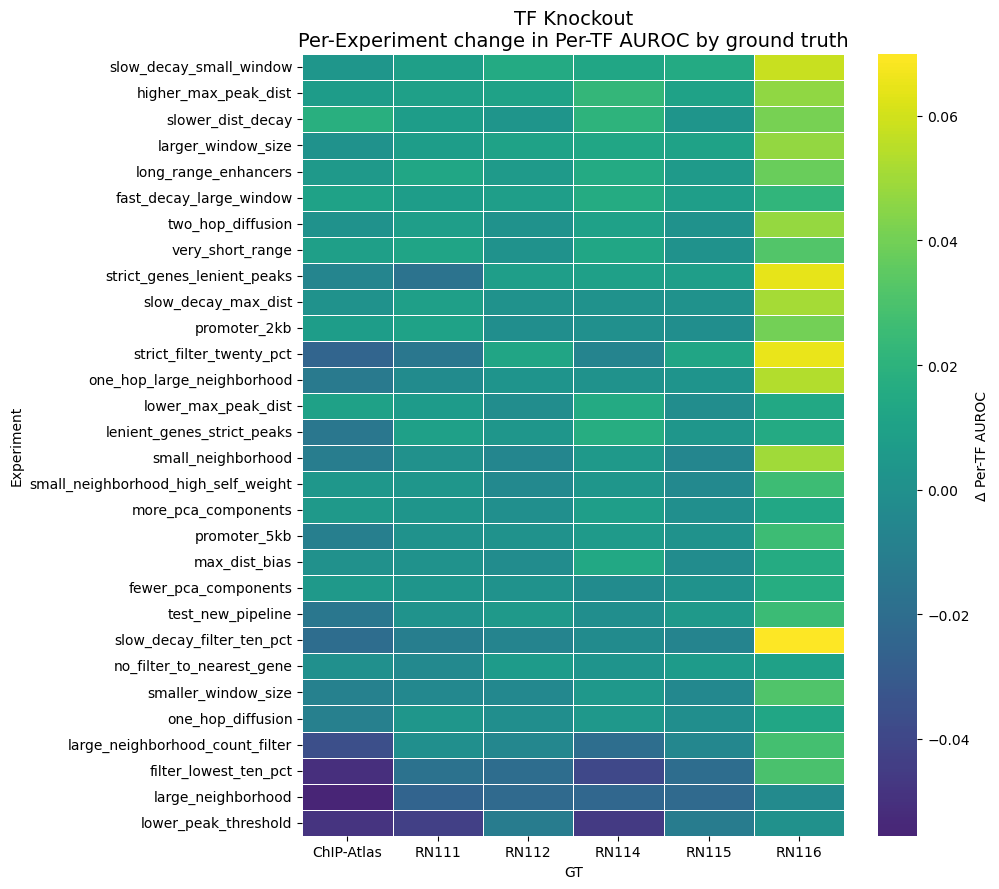

In [50]:
plot_gt_delta_heatmap(per_tf_gt_delta, "Gradient Attribution", selected_metric)
plot_gt_delta_heatmap(per_tf_gt_delta, "TF Knockout", selected_metric)

In [16]:
stability = (
    per_tf_delta[per_tf_delta["Experiment"] != BASELINE]
    .groupby(["Method", "Experiment"])["Delta"]
    .agg(
        mean_delta="mean",
        std_delta="std",
        min_delta="min",
        max_delta="max"
    )
    .reset_index()
    .sort_values(["Method", "mean_delta"], ascending=[True, False])
)

print(stability.head(10))


                  Method                  Experiment  mean_delta  std_delta  \
7   Gradient Attribution  lenient_genes_strict_peaks    0.004242   0.019469   
16  Gradient Attribution                promoter_2kb    0.003039   0.008033   
20  Gradient Attribution     slow_decay_small_window    0.002435   0.007979   
28  Gradient Attribution           two_hop_diffusion    0.002316   0.008674   
6   Gradient Attribution          larger_window_size    0.001481   0.008226   
15  Gradient Attribution  one_hop_large_neighborhood    0.001226   0.010043   
9   Gradient Attribution         lower_max_peak_dist    0.000643   0.006124   
24  Gradient Attribution         smaller_window_size    0.000503   0.008325   
3   Gradient Attribution        higher_max_peak_dist    0.000503   0.005654   
11  Gradient Attribution               max_dist_bias    0.000128   0.006440   

    min_delta  max_delta  
7   -0.019979   0.023779  
16  -0.006831   0.016123  
20  -0.008296   0.016336  
28  -0.006038   0.0147

In [17]:
win_rate = (
    per_tf_delta[per_tf_delta["Experiment"] != BASELINE]
    .assign(win=lambda d: d["Delta"] > 0)
    .groupby(["Method", "Experiment"])["win"]
    .mean()
    .reset_index(name="fraction_gt_improved")
    .sort_values(["Method", "fraction_gt_improved"], ascending=False)
)

print(win_rate.head(10))

         Method               Experiment  fraction_gt_improved
30  TF Knockout  fast_decay_large_window              1.000000
33  TF Knockout     higher_max_peak_dist              1.000000
36  TF Knockout       larger_window_size              1.000000
38  TF Knockout     long_range_enhancers              1.000000
49  TF Knockout      slow_decay_max_dist              1.000000
50  TF Knockout  slow_decay_small_window              1.000000
51  TF Knockout        slower_dist_decay              1.000000
58  TF Knockout        two_hop_diffusion              1.000000
59  TF Knockout         very_short_range              1.000000
31  TF Knockout     fewer_pca_components              0.833333


In [19]:
stability["stability_score"] = (
    stability["mean_delta"] - stability["std_delta"]
)

stability.sort_values(
    ["Method", "stability_score"],
    ascending=[True, False]
)

stability.to_csv("dev/notebooks/experiment_stability_scores.csv", index=False)
